In [10]:
import intake
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
titanic_df = intake.open_csv(os.path.join("data", "train.csv")).read()


In [9]:
titanic_data_cleaned = (titanic_data[["Survived", "Sex", "Age", "SibSp", "Name", "Parch", "Ticket", "Fare", "Cabin", "Embarked", "Pclass"]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Plot the number that survived in some broad classes

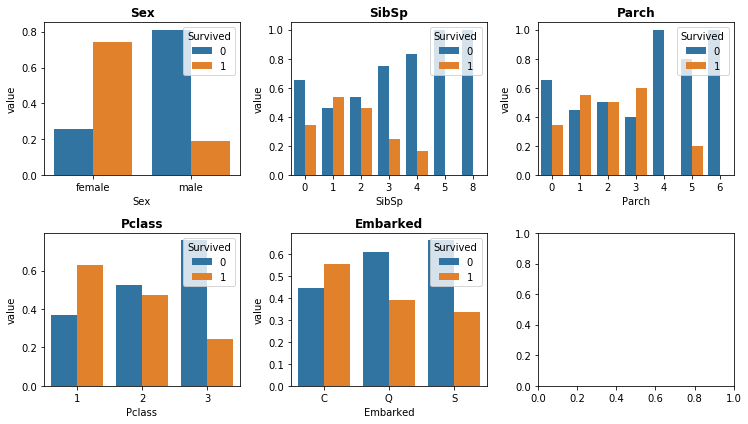

In [89]:
plot_vars = ["Sex", "SibSp", "Parch", "Pclass", "Embarked"]
nr_rows = 2
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols * 3.5, nr_rows * 3))


for i, var in enumerate(plot_vars):
    r = int(i / nr_cols)
    c = i % nr_cols
    ax = axs[r][c]
    props = (
        titanic_df.groupby(var)["Survived"]
        .value_counts(normalize=True)
        .unstack()
        .reset_index()
        .melt(id_vars=[var], value_vars=[0, 1])
    )
    sns.barplot(data=props, x=var, y="value", hue="Survived", ax=ax)
    ax.set_title(cols_plot[i], fontsize=12, fontweight="bold")
    ax.legend(title="Survived", loc="upper right")
    plt.tight_layout()

plt.tight_layout()